## Department of Computer Science, University of York
### DATA: Introduction to Data Science

## Task 1: Domain Analysis  (5 marks)

Given the business domain and the data overview presented (in the assessment paper), provide a brief description of

* the business problem and its significance to the relevant sector;
* the link between the business problem and the field of data science;
* the main areas of investigation; and
* potential ideas and solutions.


**Word Limit:** 300 words

**Write your answer here (text cell(s) to be used, as appropriate)**

The business problem is about providing optimal customer service within a UK bank which offers a wide range of financial services. 
This is done by using data analysis which will enhance customer satisfaction and inform data driven decision making which in turn, is used to conduct risk assessments and establish a customer retention scheme. 

The bridge between business problems and the field of data science is strengthened by the thorough analysis of data. 
Hence, the bank can find trends and patterns which can help them make strategic decisions, giving them an advantage. 
When they look at previous client records, account details and the statistics they can make decisions based on evidence and stats rather than intuition. 
As a result, the bank can uncover patterns and trends which can be extremely useful future decision making.  

The main areas of investigation are:
- The analysis of customer behaviour so their financial transactions can be analysed.
- Risk assessment- to see if a client can be approved for a loan and a credit card.
- Customer retention strategies- to enhance customer loyalty.
- Fraud detection to analyse transaction patterns and detect any anomalies.

Potential ideas and solutions: 
- Customer segmentation by using algorithms to attract certain customers based on financial behaviour which target marketing and retention strategies.

- Fraud detection system to analyse transaction patterns to see any anomalies or suspicious behaviour will enhance the bank's security measures once these are detected in real time. 

- Economic trend analysis to evaluate factors such as average salary and demographic to anticipate any potential impacts on customer behaviours and adjust strategies when needed.

- Predictive analytics for risk management is about creating models to assess the risk for each customer informing loan approvals and credit card limits based on transaction amounts. 


## Task 2: Database Design (25 marks)


Having understood the business domain, present a conceptual design in the form of an entity-relationship (ER) model that would be helpful in creating a database for the bank.

The bank data currently exists in the form of a csv file called *BankRecords.csv*, provided on VLE (path given in page 5, assessment paper). This file has all the existing records. The table available in the csv file is unnormalised. The information about its different columns is given in Tables 1 and 2 (in the assessment paper).

Following the standard principles of database normalisation, normalise the given table (*BankRecords.csv*) to a database schema that has minimum redundancies. Then, using the designed schema, create an SQLite database.

Your answer should include the SQL statements needed to accomplish this step. Your submission should also include the created SQLite database file.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* The designated keys, existing relationships, and identified functional dependencies;
* The steps followed and justifications for the decisions made.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code/SQL statements or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

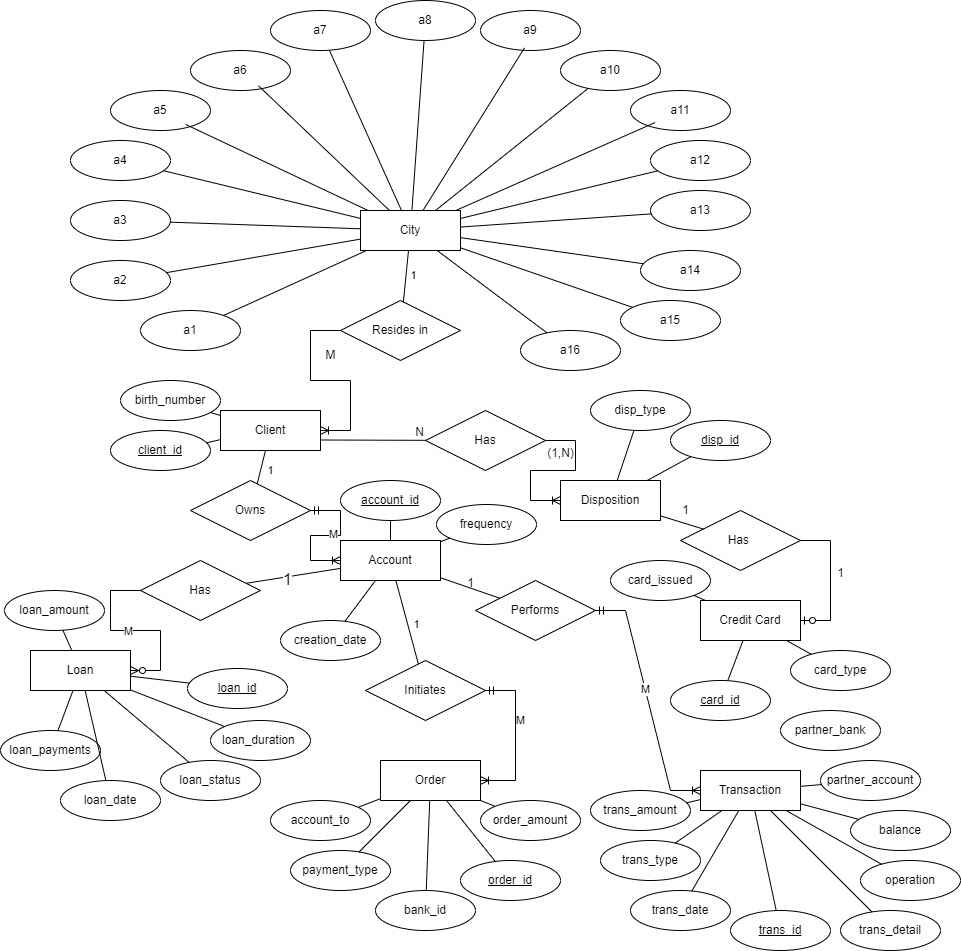

Assumptions made when creating the ER diagram:
- I assumed every card would have a disposition and every card is linked to an account. 
- 'city_code' (a1) attribute suggests that each client record is associated with a specific city identified by its code
- Not every account has a loan 


# Unnormalised

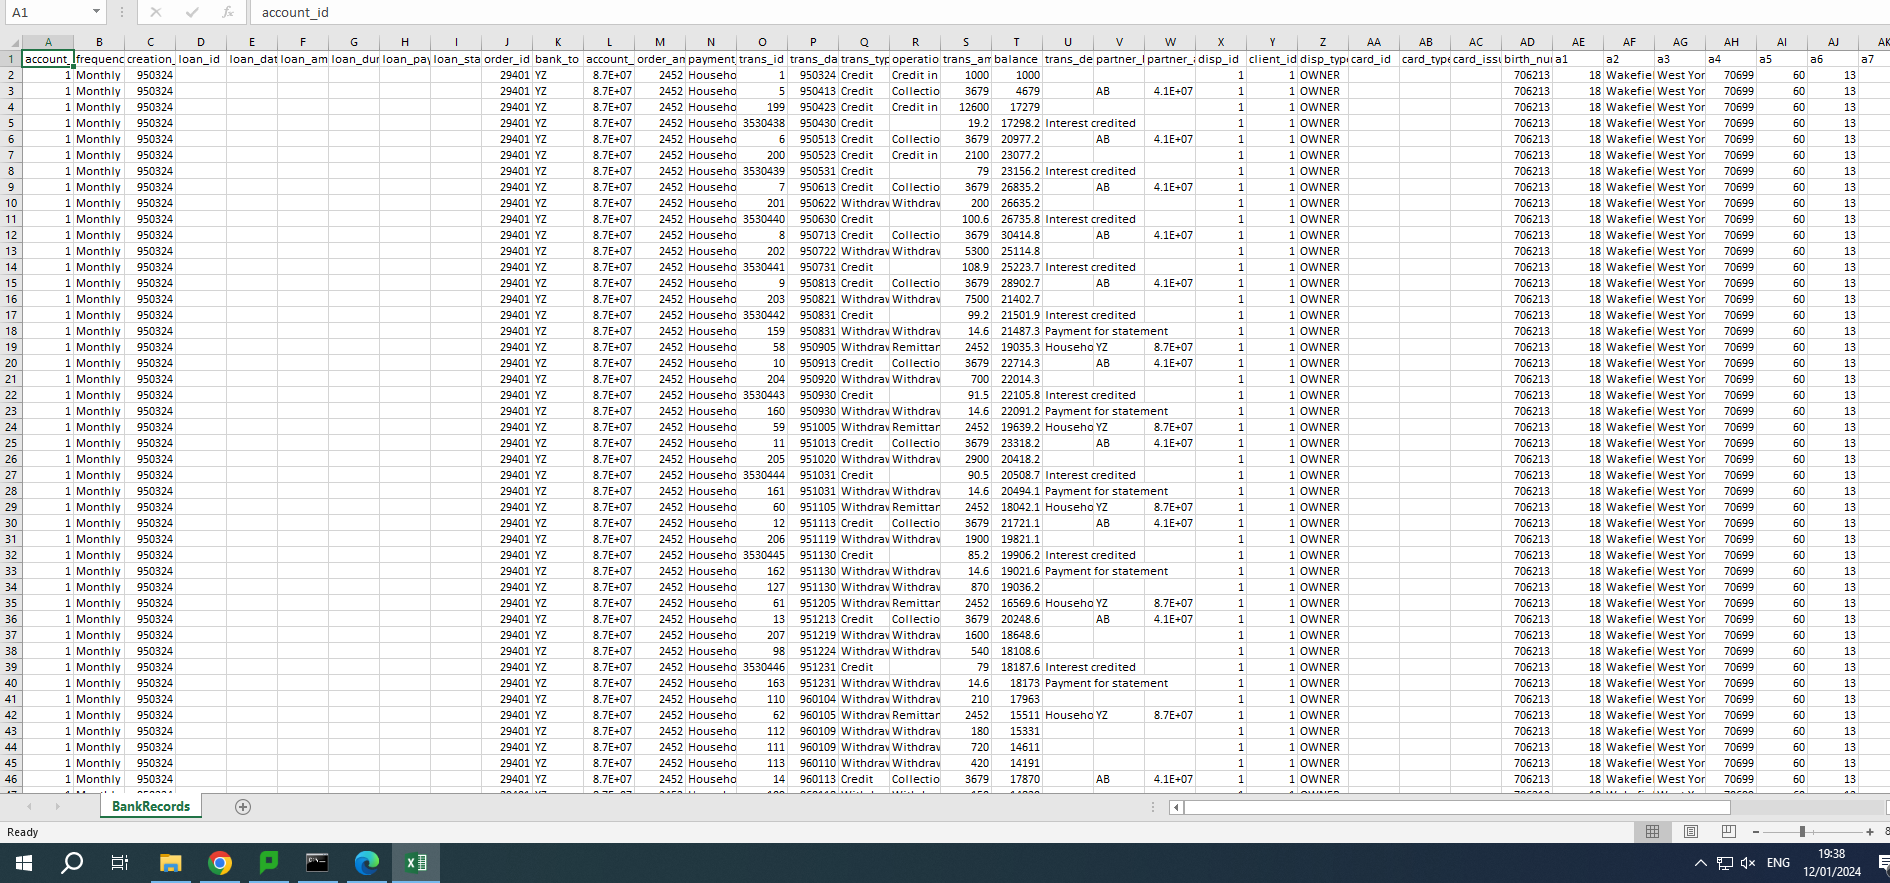

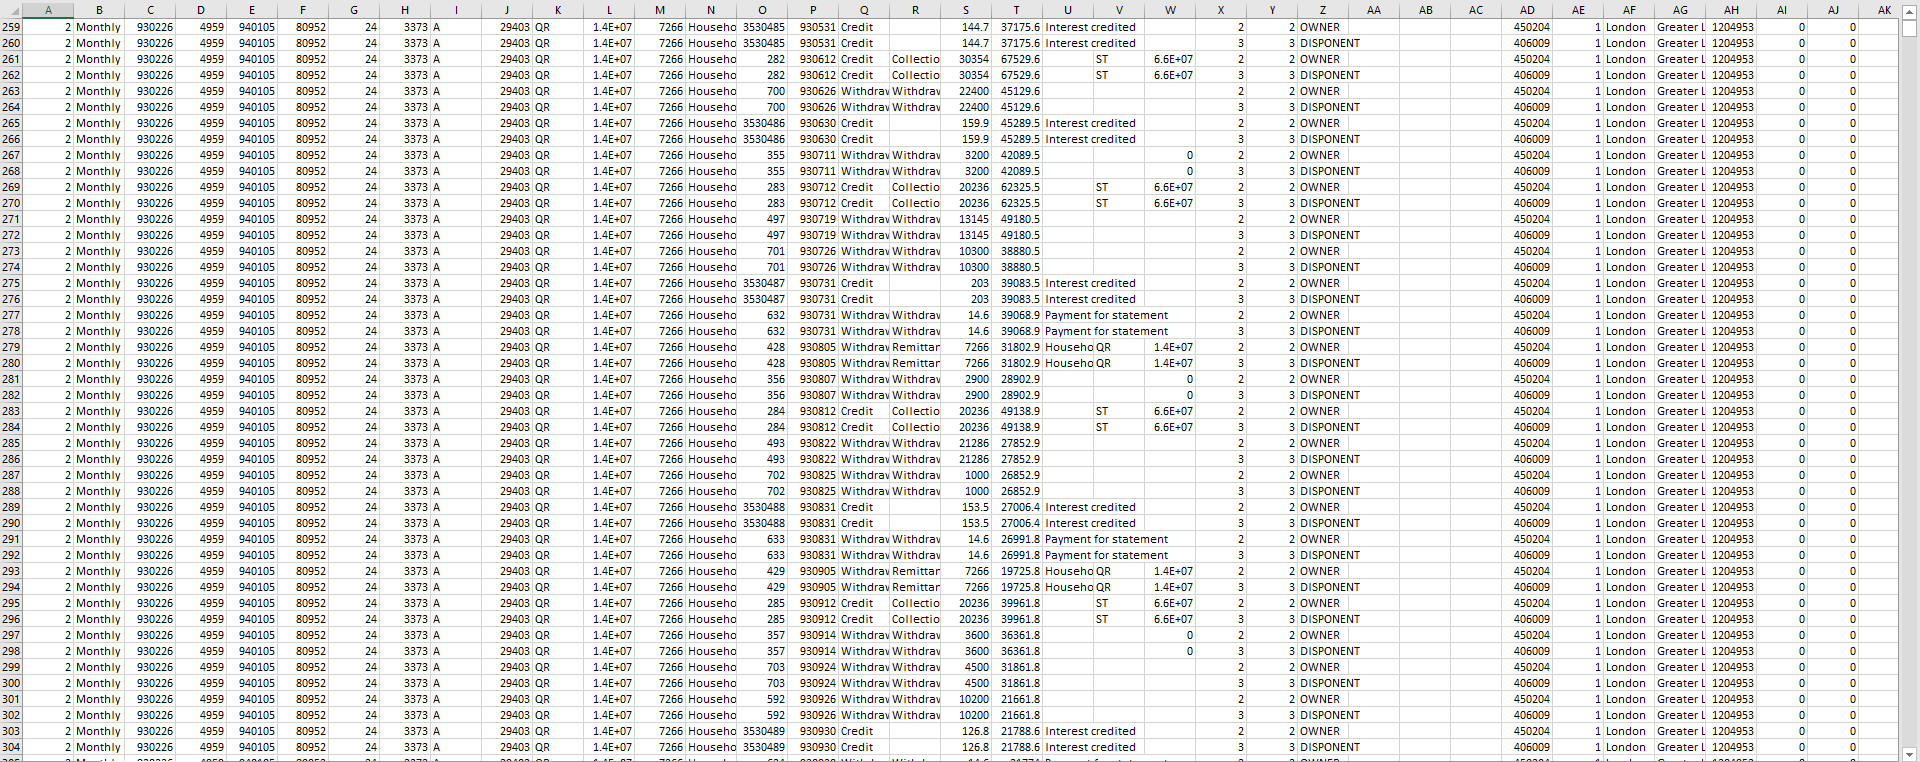

# 1NF

To transform the data into first normal form we need to ensure that each attribute contains atomic values and there are no repeating groups or arrays within a row.

1. Identify entites:
    - I created 8 entities: City, Client, Account, Disposition, Transaction, Orders, Loan, (Credit) Card 
2. Create separate tables:
    - I created separate tables for each of the entities based on the data given 
3. Attributes in each table:
    - I added attributes to each table based off the data that was given to us
4. Eliminate repeating groups: 
    - each cell now contains atomic values 

I also assigned primary keys and foreign keys as identifed in the SQL statements

# 2NF

To transform the data into second normal form I had to identify the partial dependencies and composite primary key for each table. For example in the 'Loan' table, the primary key is loan_id and the foreign key is account_id forming the composite primary key for this table. Together they uniquely identify each record. It ensures that no 2 records have the same combination of values for the specified attributes.

I have linked the Account table to 'Disposition', 'Transactions', 'Orders' and 'Loan' tables via 'account_id' as a foreign key to show the relationship between these entities. 

Also the 'Card' table is linked to 'Disposition' via 'disp_id'.

I have also linked 'a1' as a foreign  key in the 'Client' table to show the relationship between 'Client' and 'City' so when a client's information is retrieved we can identify them using their city code also. 

# 3NF

To transform the data into third normal form the data cannot have transitive dependencies so that each attribute in a table is dependent only on the primary key which will reduces redundancies. 

Example: 

For the 'City' table:
- each attribute a1,a2... dependson city_id which is the primary key 
For the 'Client' table:
- birth_number, a1 depend on client_id which is the primary key

Now all the attributes in each table depend entire on their primary key so each record can be identified clearly with this. 

Here are the SQL statements below:

## SQL statements after data normalisation

Assumptions made: 
- that disp_id in the 'Card' table is a foreign key linking to the disposition table as I assumed every card would have a disposition and every card is linked to an account. 

## Populating the tables

## Task 3: Research Design (25 Marks)

Using the database designed in Task 2, design and implement **five** potential modelling solutions to achieve the aim of the Data Intelligence team. You need to provide clear justifications about the techniques selected in the context of the 'problem in hand'. Your design must consist of a combination of inferential statistics, supervised learning algorithms, and unsupervised learning algorithms, and include **at least one** of those techniques. Finally, your modelling solutions should be of sufficient complexity, combining information from multiple tables from the database built in Task 2, as appropriate. Your answer should clearly show the queries made to the database. If amendments are made to the database, the commands should be clearly included in your answer.

Your answer should clearly cover the following:
* Any assumptions you are making about the given scenario;
* Any data processing and data integrity steps you would undertake to make the data fit for purpose;
* Which technique(s) you would apply for each solution and why;
* An evaluation of the techniques applied in terms of the accuracy of their results (or any other suitable evaluation measure);
* Algorithmic parameters should be adequately stated and discussed;
* A discussion of ethical considerations arising from the solutions selected.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

### 1. Unsupervised Model: K-means clustering

K- means clustering was applied to customer transactions data, grouping clients into 4 clusters based on their average transaction amounts and balances. The analysis reveals a positive correlation that clients with higher balances usually have higher transaction amounts. 

To find the optimal number of clusters, an elbow analysis was conducted indicating that k=4 is the optimal choice. 

Ethical considerations such as transparancy and data protection were taken into account during the analysis. This unsupervised learning technique offers insights into customer segments based on their financial behaviour, promoting data driven decision making for the business. 

In [1]:
import sqlite3
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


conn = sqlite3.connect('dataexam.db')

query = '''SELECT
    C.client_id,
    AVG(T.trans_amount) AS trans_amount,
    AVG(T.balance) AS avg_balance
FROM
    Client C
JOIN
    Account A ON C.client_id = A.client_id
JOIN
    "Transaction" T ON A.account_id = T.account_id
GROUP BY
    C.client_id;
'''
transaction_data = pd.read_sql_query(query, conn)

# Select relevant features for clustering
selected_features = transaction_data[['trans_amount', 'avg_balance']]

# Standardise the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Number of clusters chosen
num_clusters = 4  

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
transaction_data['cluster'] = kmeans.fit_predict(scaled_data)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


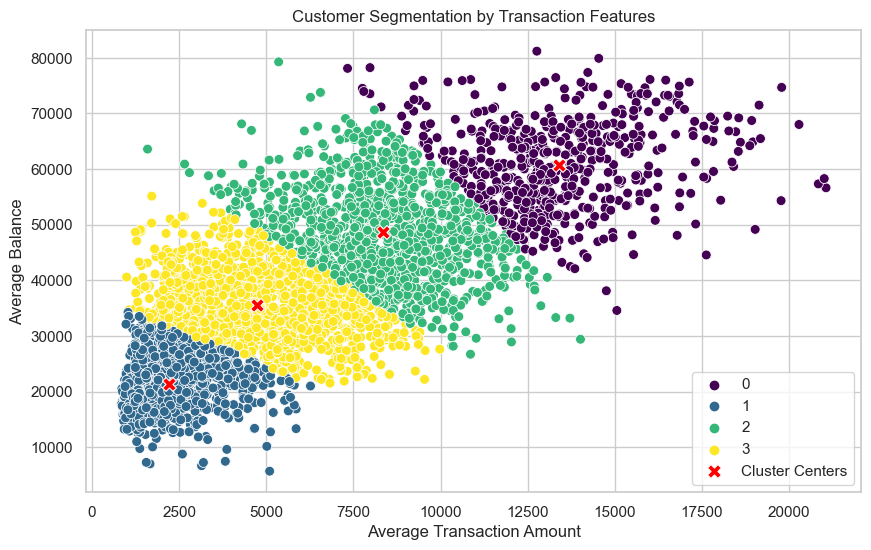

In [2]:
import seaborn as sns

sns.set(style='whitegrid')

# Plot the clusters using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trans_amount', y='avg_balance', hue='cluster', data=transaction_data, palette='viridis', s=50)

# Plot the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=['trans_amount', 'avg_balance'])
sns.scatterplot(x='trans_amount', y='avg_balance', data=cluster_centers, color='red', marker='X', s=100, label='Cluster Centers')

plt.title('Customer Segmentation by Transaction Features')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Average Balance')
plt.legend()
plt.show()


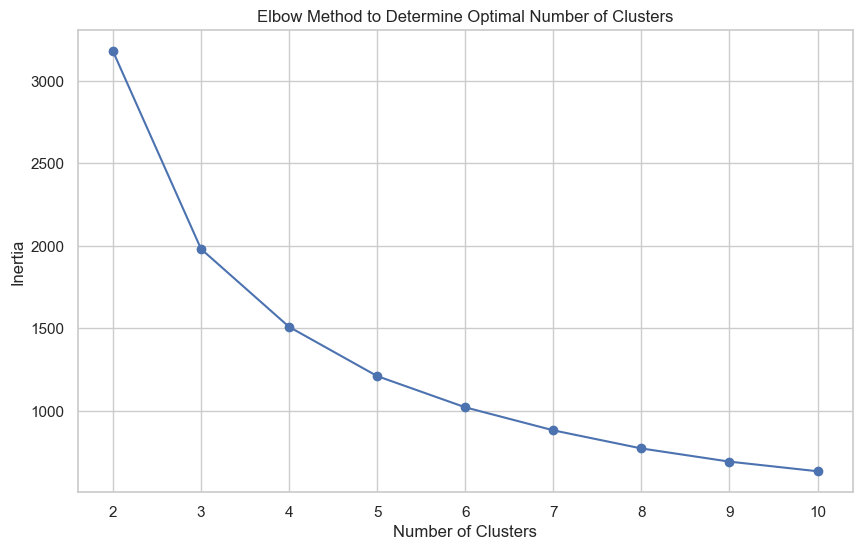

In [3]:
from sklearn.metrics import silhouette_score

# Elbow Method
inertia_values = []
for k in range(2, 11):  # Trying different number of clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia_values, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.show()


Gradual decrease at k=4

### 2.  Supervised learning model: Decision Trees

This supervised learning model uses a decision tree for fraud detection, assuming high data quality and privacy to customers. It uses the data to calculate the averages and identifies anomalies based on 3 levels: blue (normal), green (suspicious) and red (highly anomalous). Algorithmic parameters like Max depth=3 otherwise there would be overfitting in the decision tree visualisation. 

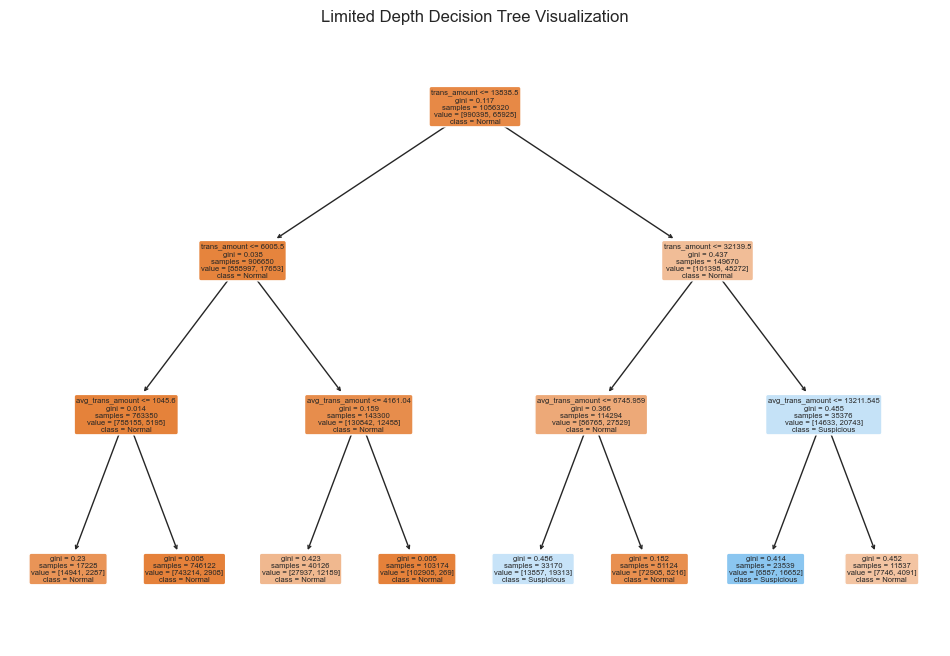

In [43]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

conn = sqlite3.connect('dataexam.db')

query = """
SELECT 
    t.trans_id,
    t.account_id,
    t.trans_amount,
    AVG(t.trans_amount) OVER (PARTITION BY t.account_id) as avg_trans_amount
FROM "Transaction" t
JOIN Account a ON t.account_id = a.account_id;
"""
df_transactions = pd.read_sql_query(query, conn)

conn.close()

# Define both lower and higher threshold levels
lower_threshold = 3 * df_transactions['avg_trans_amount']
higher_threshold = 5 * df_transactions['avg_trans_amount']

# Classification of transactions
df_transactions['is_suspicious'] = (df_transactions['trans_amount'] > lower_threshold) & (df_transactions['trans_amount'] <= higher_threshold)
df_transactions['is_highly_anomalous'] = df_transactions['trans_amount'] > higher_threshold

features = df_transactions[['trans_amount', 'avg_trans_amount']]

# Creating and training the decision tree model with a depth of 3
model = DecisionTreeClassifier(max_depth=3)
model.fit(features, df_transactions['is_suspicious'])

# Visualise the limited depth decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=features.columns, class_names=["Normal", "Suspicious"], filled=True, rounded=True)
plt.title("Limited Depth Decision Tree Visualization")
plt.show()


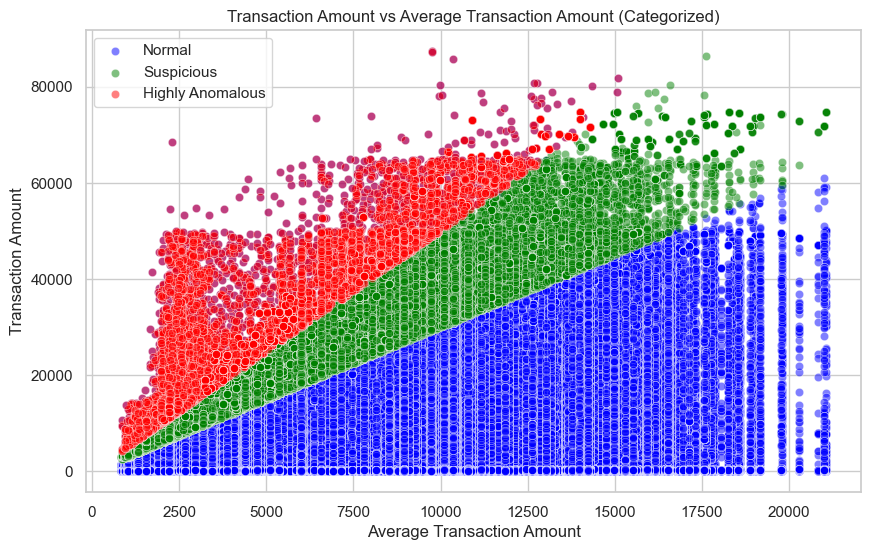

In [46]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

conn = sqlite3.connect('dataexam.db')

query = """
SELECT 
    t.trans_id,
    t.account_id,
    t.trans_amount,
    AVG(t.trans_amount) OVER (PARTITION BY t.account_id) as avg_trans_amount
FROM "Transaction" t
JOIN Account a ON t.account_id = a.account_id;
"""
df_transactions = pd.read_sql_query(query, conn)

conn.close()

# Define both lower and higher threshold levels
lower_threshold = 3 * df_transactions['avg_trans_amount']
higher_threshold = 5 * df_transactions['avg_trans_amount']

# Classification of transactions
df_transactions['is_suspicious'] = (df_transactions['trans_amount'] > lower_threshold) & (df_transactions['trans_amount'] <= higher_threshold)
df_transactions['is_highly_anomalous'] = df_transactions['trans_amount'] > higher_threshold

features = df_transactions[['trans_amount', 'avg_trans_amount']]

# Splitting data into training and testing sets
X_train, X_test = train_test_split(features, test_size=0.2, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, df_transactions.loc[X_train.index, 'is_suspicious'])

# Predicting
df_transactions['predictions'] = model.predict(features)

sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))

# Plot normal transactions
sns.scatterplot(x='avg_trans_amount', y='trans_amount', 
                data=df_transactions[df_transactions['predictions'] == False], 
                color='blue', label='Normal', alpha=0.5)

# Plot suspicious transactions
sns.scatterplot(x='avg_trans_amount', y='trans_amount', 
                data=df_transactions[df_transactions['is_suspicious']], 
                color='green', label='Suspicious', alpha=0.5)

# Plot highly anomalous transactions
sns.scatterplot(x='avg_trans_amount', y='trans_amount', 
                data=df_transactions[df_transactions['is_highly_anomalous']], 
                color='red', label='Highly Anomalous', alpha=0.5)

plt.xlabel('Average Transaction Amount')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs Average Transaction Amount (Categorized)')
plt.legend()
plt.show()


Graph is used to compare the 3 categories and see the spread of the data.

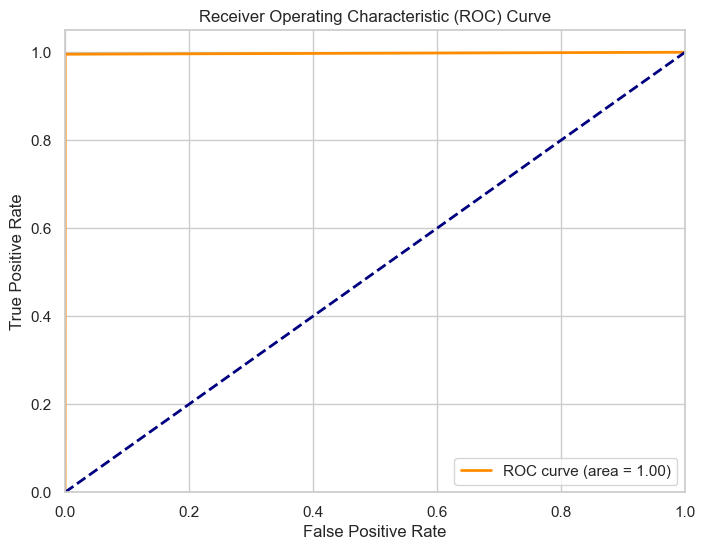

In [41]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

conn = sqlite3.connect('dataexam.db')

# Calculate ROC curve
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(df_transactions.loc[X_test.index, 'is_suspicious'], y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()


ROC area under curve = 1 which shows that the model can distinguish between suspicious and non suspicious transactions with complete accuracy. 

### Inferential statistics model: ANOVA 

Assuming that there are no outliers and that transaction amounts from each credit card type are independent of each other, ANOVA is used to assess differences in mean transaction amounts across credit card types. Data integrity- various sources. The evaluation is based on p and f values with a low p value(<0.05) indicating significant group differences. The degrees of freedom and sum of squares are key parameters which explain variance among the groups. 

In [47]:
#Null hypothesis (H0):
#There is no significant difference in the mean transaction amounts among the different credit card types.

#Alternative hypothesis (H1):
#There is a significance difference in the mean transaction amounts among the different credit card types. 

In [51]:
import sqlite3
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

conn = sqlite3.connect('dataexam.db')

query = """
SELECT T.trans_amount, C.card_type
FROM "Transaction" T
JOIN Account A ON T.account_id = A.account_id
JOIN Disposition D ON A.account_id = D.account_id
JOIN Card C ON D.disp_id = C.disp_id
"""
data = pd.read_sql_query(query, conn)

conn.close()

# Perform hypothesis test (ANOVA)- use linear regression 
model = ols('trans_amount ~ C(card_type)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Check if the result is statistically significant (alpha = 0.05)
alpha = 0.05
p_value = anova_table['PR(>F)'][0]  # P-value for the credit card type

# Display the p-value from the ANOVA results
print(f"P-value: {p_value}")

# The ANOVA results in a table
print(anova_table)

###ANOVA calculation formally### 

# Extract the sum of squares for the model (SSM) and residual (SSE)
SSM = anova_table['sum_sq'][0]
SSE = anova_table['sum_sq'][1]

# Calculate degrees of freedom for the model (dfM) and residual (dfE)
dfM = anova_table['df'][0]
dfE = anova_table['df'][1]

# Calculate MSM (Mean Square for Model) and MSR (Mean Square for Residual)
MSM = SSM / dfM
MSR = SSE / dfE

# Calculate F-statistic
F = MSM / MSR

# Compare MSM and MSR
if F < 1:
    print("MSR > MSM, indicating more unsystematic variance.")
else:
    print("MSR < MSM, indicating more systematic variance.")
#Systematic variation indicates the amount of variability in transaction amounts that can be explained 
#by the differences between the credit card types, indicating that the credit card types have significant 
#effect on trans_amount

#Unsystematic represents the portion of variability that remains unexplained and can be due to various factors

if p_value < alpha:
    print("The result is statistically significant. Reject the null hypothesis.")
else:
    print("The result is not statistically significant. Fail to reject the null hypothesis.")


P-value: 4.515822952041425e-61
                    sum_sq        df           F        PR(>F)
C(card_type)  3.920934e+10       2.0  139.037134  4.515823e-61
Residual      3.129353e+13  221935.0         NaN           NaN
MSR < MSM, indicating more systematic variance.
The result is statistically significant. Reject the null hypothesis.


The small p-value and f-statistic (139.04) indicate strong evidence against the null hypothesis, suggesting that credit card types significantly impact transaction amounts.

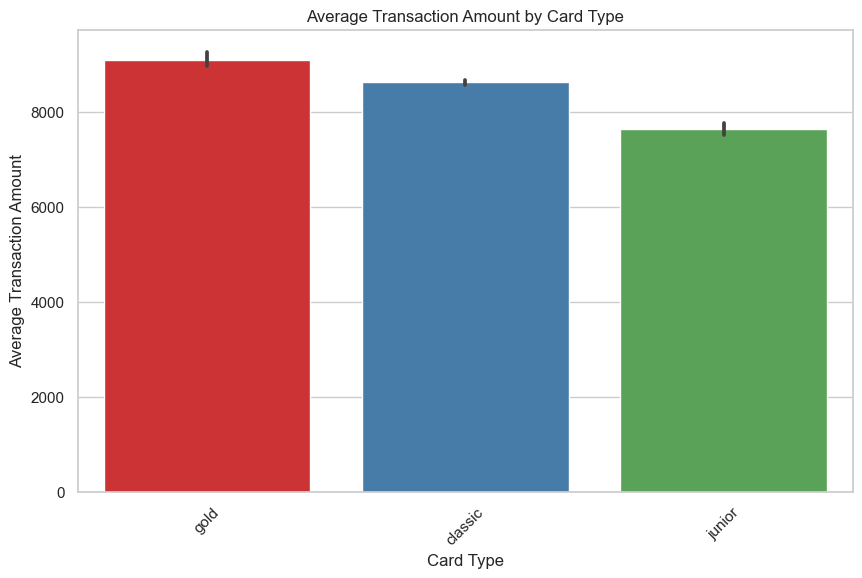

In [6]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect('dataexam.db')

query = """
SELECT T.trans_amount, C.card_type
FROM "Transaction" T
JOIN Account A ON T.account_id = A.account_id
JOIN Disposition D ON A.account_id = D.account_id
JOIN Card C ON D.disp_id = C.disp_id
"""
data = pd.read_sql_query(query, conn)

conn.close()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='card_type', y='trans_amount', data=data, palette='Set1')
plt.xlabel('Card Type')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Card Type')
plt.xticks(rotation=45) 
plt.show()


Card type with the highest transaction amount is gold, then classic, then junior which is supportive of the information provided by the bank.

### 4. Supervised learning model: Random Forest Classifier 

In my analysis, I maintained the default settings for the random forest classifier, believing they provide a solid base. When I saw missing data I chose to exclude it rather than fill it as imputation negatively impacted A and C when looking at accuracy. 

Also, random forest is useful for both classification and regression. I converted categorical data into numerical form using one hot encoding and assessed model performance with accuracy, a confusion matrix and a classification report. Visualising results via a heatmap helped with interpretability. Model doesn't introduce bias against specific groups- fair.

In [4]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

conn = sqlite3.connect('dataexam.db')

query = """
    SELECT
        C.client_id,
        A.frequency,
        T.trans_type,
        T.operation,
        T.trans_amount,
        T.balance,
        L.loan_status,
        C2.card_type
    FROM Client AS C
    INNER JOIN Account AS A ON C.client_id = A.client_id
    LEFT JOIN "Transaction" AS T ON A.account_id = T.account_id
    LEFT JOIN Loan AS L ON A.account_id = L.account_id
    LEFT JOIN Disposition AS D ON A.account_id = D.account_id
    LEFT JOIN Card AS C2 ON D.disp_id = C2.disp_id
"""

data = pd.read_sql_query(query, conn)

# Remove rows with missing values
data.dropna(inplace=True)

# Convert categorical features/variables to numeric using one-hot encoding
data = pd.get_dummies(data, columns=['frequency', 'trans_type', 'operation', 'card_type'], drop_first=True)

# Define the target variable
target_variable = 'loan_status'

# Split the data into training and testing sets
X = data.drop(target_variable, axis=1)
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.960678391959799
Confusion Matrix:
[[3714    4   90    2]
 [  17  150    2    0]
 [ 166    2 3658    2]
 [  17    0   11  125]]
Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.97      0.96      3810
           B       0.96      0.89      0.92       169
           C       0.97      0.96      0.96      3828
           D       0.97      0.82      0.89       153

    accuracy                           0.96      7960
   macro avg       0.96      0.91      0.93      7960
weighted avg       0.96      0.96      0.96      7960



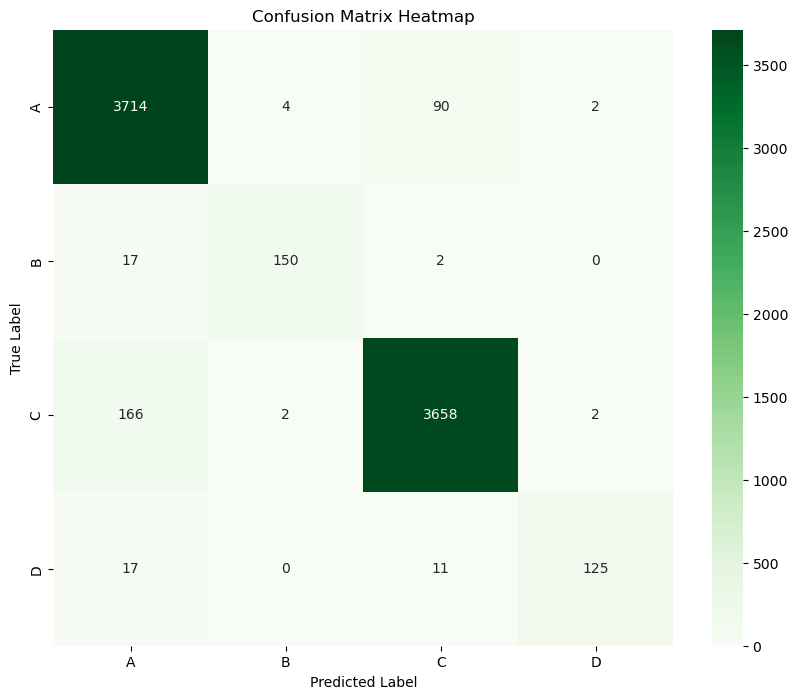

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Substitute the confusion matrix 
conf_matrix = [[3714, 4, 90, 2], [17, 150, 2, 0], [166, 2, 3658, 2], [17, 0, 11, 125]] 

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Greens', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The model accuracy is quite high at 96.07% across 4 categories (A,B,C,D). It showed the best precision for predicting loan status categories A and C, however for B and D the model shows a lower recall which leads to a higher number of false negatives.

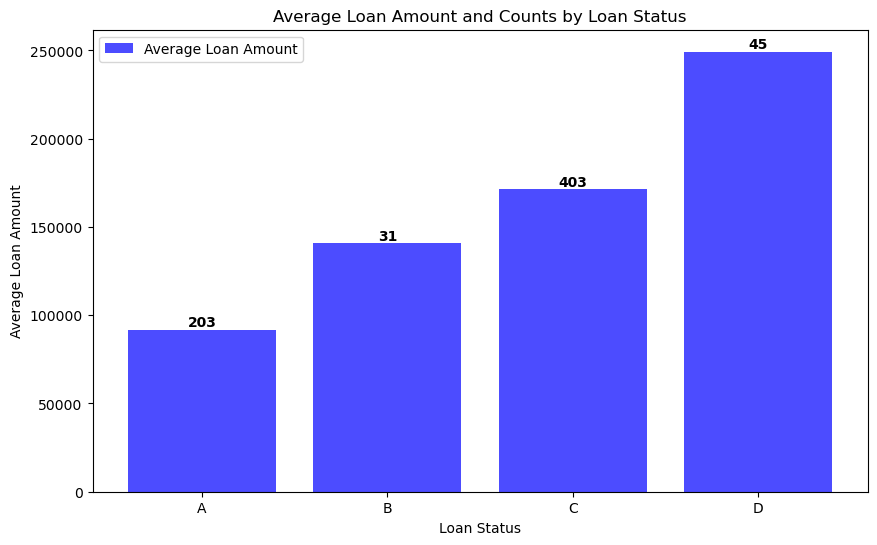

In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('dataexam.db')

query = '''
SELECT
    loan_status,
    AVG(loan_amount) AS avg_loan_amount,
    COUNT(*) AS status_count 
FROM
    Loan
GROUP BY
    loan_status;
'''

data = pd.read_sql_query(query, conn)

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plotting average loan amount
plt.bar(data['loan_status'], data['avg_loan_amount'], color='blue', label='Average Loan Amount', alpha=0.7)

# Adding counts of loan statuses on top of the bars
for i, count in enumerate(data['status_count']):
    plt.text(i, data['avg_loan_amount'][i] + 50, str(count), ha='center', va='bottom', color='black', fontweight='bold')

# Adding labels and title
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount')
plt.title('Average Loan Amount and Counts by Loan Status')
plt.legend()

# Display the plot
plt.show()


Overview of loan statuses while the confusion matrix provides detailed insights into the model's performance across different loan status classes. 

### Inferential statistic: t-test

In [ ]:
#The null hypothesis for each is there is no difference in the 'latest account balance or no. of transactions or average 
#loan amount' for male and female clients which means that any obsereved difference is due to random variation.

Code assumes gender classification based on birth numbers and performs t-tests to compare male and female clients' financial details. Assumptions include data integrity and 0.05 as a significance level. Techniques used was independent 2 sample tests to compare 2 groups. Ethics- must avoid gender sterotypes and discrimination.

In [1]:
import sqlite3
import pandas as pd
from scipy import stats

# Connect to the database
conn = sqlite3.connect('dataexam.db')

# Creating the 3 queries for latest account balance, number of transactions and average loan amount 
# includes how to find the gender based on birth date
queries = {
    "Latest Account Balance": {
        "query": {
            "male": """
                SELECT t.balance as latest_balance
                FROM "Transaction" t
                INNER JOIN (
                    SELECT account_id, MAX(trans_id) as max_trans_id
                    FROM "Transaction"
                    GROUP BY account_id
                ) latest_t ON t.account_id = latest_t.account_id AND t.trans_id = latest_t.max_trans_id
                JOIN Account a ON t.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) <= 50
            """,
            "female": """
                SELECT t.balance as latest_balance
                FROM "Transaction" t
                INNER JOIN (
                    SELECT account_id, MAX(trans_id) as max_trans_id
                    FROM "Transaction"
                    GROUP BY account_id
                ) latest_t ON t.account_id = latest_t.account_id AND t.trans_id = latest_t.max_trans_id
                JOIN Account a ON t.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) > 50
            """
        },
        "column": "latest_balance"
    },
    "Number of Transactions": {
        "query": {
            "male": """
                SELECT COUNT(t.trans_id) as num_transactions
                FROM "Transaction" t
                JOIN Account a ON t.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) <= 50
                GROUP BY c.client_id
            """,
            "female": """
                SELECT COUNT(t.trans_id) as num_transactions
                FROM "Transaction" t
                JOIN Account a ON t.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) > 50
                GROUP BY c.client_id
            """
        },
        "column": "num_transactions"
    },
    "Average Loan Amount": {
        "query": {
            "male": """
                SELECT AVG(l.loan_amount) as avg_loan_amount
                FROM Loan l
                JOIN Account a ON l.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) <= 50
                GROUP BY c.client_id
            """,
            "female": """
                SELECT AVG(l.loan_amount) as avg_loan_amount
                FROM Loan l
                JOIN Account a ON l.account_id = a.account_id
                JOIN Disposition d ON a.account_id = d.account_id
                JOIN Client c ON d.client_id = c.client_id
                WHERE CAST(SUBSTR(c.birth_number, 3, 2) AS INTEGER) > 50
                GROUP BY c.client_id
            """
        },
        "column": "avg_loan_amount"
    }
}

def get_data(query):
    return pd.read_sql_query(query, conn)

# Perform the t-tests and collect results
#omit results with NaN
results = []
for test_name, test_details in queries.items():
    male_data = get_data(test_details["query"]["male"])
    female_data = get_data(test_details["query"]["female"])
    t_stat, p_val = stats.ttest_ind(
        male_data[test_details["column"]],
        female_data[test_details["column"]],
        equal_var=False,
        nan_policy='omit'
    )
    results.append({
        "Test": test_name,
        "T-statistic": t_stat,
        "P-value": p_val
    })

# Create a DataFrame to display results
df_results = pd.DataFrame(results)

print("Summary of T-Test Results:")
print(df_results)


Summary of T-Test Results:
                     Test  T-statistic   P-value
0  Latest Account Balance     0.585022  0.558558
1  Number of Transactions     0.221077  0.825041
2     Average Loan Amount    -0.545649  0.585455


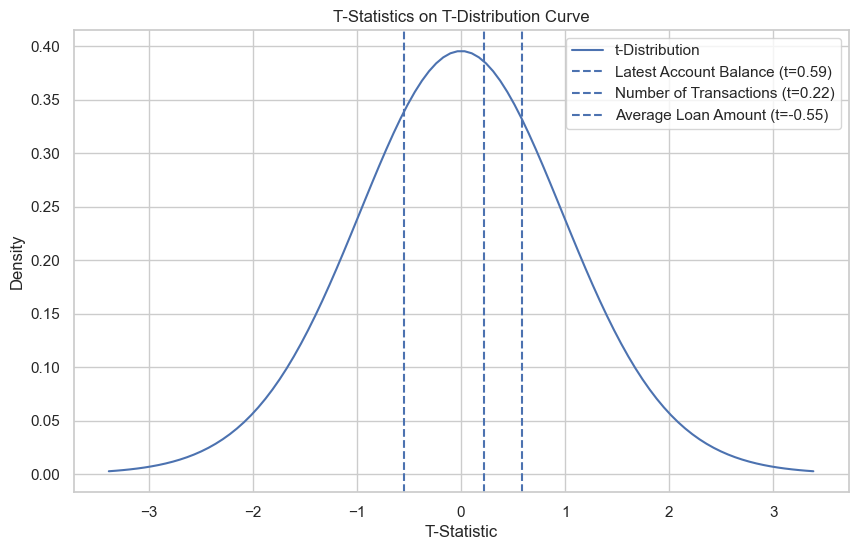

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns

def plot_t_statistic(df, dof):
    #df = dataframe containing t-test results
    #dof = degrees of freedom for t distribution 
    x = np.linspace(t.ppf(0.001, dof), t.ppf(0.999, dof), 100)
    y = t.pdf(x, dof)
    
    plt.figure(figsize=(10, 6))
    #using seaborn to plot the curve
    sns.lineplot(x=x, y=y, label='t-Distribution')
    
    # loops over the dataframe representing one t test result
    for _, row in df.iterrows():
        plt.axvline(x=row['T-statistic'], label=f"{row['Test']} (t={row['T-statistic']:.2f})", linestyle='--')
    
    plt.title('T-Statistics on T-Distribution Curve')
    plt.xlabel('T-Statistic')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

df_results = pd.DataFrame({
    "Test": ["Latest Account Balance", "Number of Transactions", "Average Loan Amount"],
    "T-statistic": [0.585022, 0.221077, -0.545649],
    "P-value": [0.558558, 0.825041, 0.585455]
})

dofC = 30  # dof value (any one chosen)

plot_t_statistic(df_results, dofC)


t-test shows that there is no statistically significant difference between male and female clients in terms of financial details. Gender does not have a significant impact on these variables in the data. 

## Task 4: Experimental Results and Analysis (25 Marks)

Given the **five** modelling solutions implemented above, analyse, discuss and present your findings to the key stakeholders of the bank.

Your answer should clearly cover the following:
* Present your findings in a clear and concise manner;
* Discuss your results in the context of the selected solution;
* Discuss how these results can help the bank in performing customer risk assessment and establishing customer retention strategies;
* Present the limitations (if any) of your solutions in a clear and concise manner.

**World Limit**: 500 words. This limit applies only to the explanations. There is no limit on any associated code or figures.

**Write your answer here (text cell(s) to be used, as appropriate)**

## Analysis of the 5 modelling solutions

### 1. Customer segmentation (K means clustering)

#### Findings & context:
- Customer segmentation based on average transaction amount and account balance reveals specific customer behaviours, allowing the bank to tailor services and improve satisfaction. Segments help understand diverse range of customers and their banking needs.

#### Application:
- Tailor services to each segment e.g. premium services for high value customers.

#### Limitations:
- Predefined clusters: must specify no. of clusters beforehand 
- Outlier sensitivity: extreme values can distort cluster means 

### 2. Customer risk assessment (Decision tree)

#### Findings & context:
- Transaction categorised into normal, suspicious, and highly anomalous aids in identifying potential risks like fraud and money laundering, reducing false positives for better customer experience.

#### Application:
- Customer retention strategies: prioritise high risk transactions for review, legitimate transactions less likely to be incorrectly blocked; better customer experience 
- Customer risk assessment: enhance risk management (fraud detection)

#### Limitations:
- False positives/negatives 
- Complex fraud patterns 
- Limited contextual information 
- Frequent alarms impact customer experience 

### 3. Analysis of transaction behaviours across credit card types (ANOVA)

#### Findings & context:
- Significant difference in mean transaction amounts among credit card types suggests tailored marketing, credit risk assessment and reward programs.
- low p value and high f = reject null hypothesis.
#### Application:
- Identifying spending patterns for credit risk assessment
- Predicting credit risk based on transaction amounts 
- Personalised reward programs for customer engagement 

#### Limitations:
- Statistical assumptions 
- Overlooking other factors like demographics 


### Loan status predictor (Random forest classifier) 

#### Findings & Context:
- Loan status prediction using random forests help identify potential loan defaults and informs customer retention strategies
- Model shows 96% accuracy

#### Application:
- Identify clients likely to default and offer personalised financial planning services 

#### Limitations:
- Limited interpretability of random forests 
- Dynamic financial patterns affect model accuracy 


### Gender financial analysis: enhancing business decision making  

#### Findings & Context:
- t- tests conducted found no significant differences in latest account balances,no. of transactions or average loan amounts between male and female clients in the data set. These results indicate that gender is not a significant factor in assessing customer risk or forming retention strategies.

#### Application:
- Risk assessment: bank can prioritise other financial indicators other than gender when evaluating creditworthiness of clients. Allows for more data driven apprach to assessing likelihood of loan repayment. 
- Rentention strategies: customer retention efforts should be based on factors beyond gender, should focus on financial behaviours and feedback which would be more effective and fair. 

#### Limitations:
- Findings are specific to this dataset 
- Ethican considerations: although gender is not a significant factor in this analysis, should focus on other non discriminatory critera for the bank's goals

## General limitations of the solutions

1. Models are based on certain assumptions but assumptions may not match real world 
2. Real world is always changing so models may not predict the future accurately 
3. Analysis might affect people and data that is used must be correct and fair to everyone 


## Task 5: Conclusion (10 Marks)

Given the insights derived from Tasks 1-4, provide a conclusion that clearly covers the following:
* A summary of the main points;
* A discussion of the significance of your results;
* Any recommendation(s) resulting from your analysis;
* Any overall ethical considerations arising from the data analysis of this business domain.

**World Limit**: 300 words.

**Write your answer here (text cell(s) to be used, as appropriate)**

In conclusion, the in depth analysis conducted on customer segmentation, customer risk assessment (fraud detection), credit card analysis and enhancing business decision making is crucial for the bank to improve customer service. 

The analysis of customer segmentation and behaviour is essential for customer retention and long term loyalty as the bank can offer more relevant servies to the customers. Keeping those high value customers happy is bound to bring positives for the bank. 

By categorising transactions the bank can identify potential risks like fraud  more accurately which improves customer experience as there are less false positives.This is really important for customers as they want to trust that their transactions are processed without any issues.

It's interesting to study credit card analysis as its important for targeted marketing strategies and customised reward programs which can increase revenue. Once the bank understands spending behaviours across different types of cards they can spot patterns and make better suited rewards and strategies to improve the overall customer experience.  

Looking at the role gender plays eliminates any forms of discriminations which the bank may have. By analysing how services are used by different genders the bank can identify any bias' in their service which will improve customer satisfaction. 

I recommend the bank to implement the following:
- tailored services especially for high value customers
- prioritising effective risk management strategies against fraudulent behaviour from outside
- improve marketing strategies based on credit card analysis 
- focus on finding a balance to make sure every customer gets equal treatment. 

Ethical considerations:
- The bank must be transparent and fair with their customers in order to protect customer privacy/confidentiality in order to maintain trust between them to ensure customer satisfaction. 

#### References:

**Pandas API Reference**: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

**Matplotlib API Reference**: https://matplotlib.org/stable/api/index.html

**Seaborn API Reference**: https://seaborn.pydata.org/api.html

**Scipy Stats API Reference**: https://docs.scipy.org/doc/scipy/reference/stats.html

**K-means Reference**: https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

**Decision tree Reference**: https://scikit-learn.org/stable/modules/tree.html#decision-trees

**Train/Test split Reference**: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

**ROC curve Reference**: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

**ANOVA reference**: 

**F table Reference**  https://www.sjsu.edu/faculty/gerstman/StatPrimer/F-table.pdf






## Overall Academic Quality (10 Marks)
10 marks are allocated for the clarity and cohesiveness of your answers (both text and code) across all tasks with appropriate, relevant and effective analysis and presentation of the results.

## Deliverables

You should submit the following to the submission point on the teaching portal:

1. the SQLite database produced in Task 2;
2. the completed Jupyter notebook (both .ipynb and HTML files) that also includes the SQL statements (Task 2), the research design and its implementation (Task 3), and the analysis and presentation of your results (Task 4);
3. any figures or diagrams that are included in your answers in the Jupyter notebook.

For each task where text is required, we have provided guidelines above on the suggested word counts. Exceeding the word count will result in any work beyond the word count being disregarded when assessing.